# Credit Risk

Credit risk is the risk of a borrowewr not repaying a loan, credit card, or any other type of credit facility.

<br>
Going to <bold> predict wether someone will default a loan</bold>.


## Data Prep and Pre-Processing

In [49]:
# initial imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Reading in the data
## The file is too large to upload onto Github
### Please go to the following link to download the dataset
#### https://drive.google.com/file/d/1xaF743cmUgI5kc76I86AeZDE84SMkMnt/view
data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\johan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(466285, 74)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [8]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [9]:
# create a new column based on the loan_status column that will be our target variable
data['status'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)

There are 74 columns and I am assuming that they are not all useful. Especially the ones that have a high number of null values. 

At this point i need to do some feature reduction. The first step that I part of feature reduction I will do is remove the columns that have a high volume of null values.

In [10]:
# Create a simple series with null counts of each column
data_null_counts = data.isnull().sum().sort_values(ascending = False)

In [11]:
# Create variables for the row and column dimensions
data_row_size, data_column_size = data.shape

In [12]:
# Iterate through the data_null_counts list
# If the null counts is more than 30% of the total number of rows
# we save the column name to a list

high_null_column_names = []
for i in range(data_column_size):
    if data_null_counts[i] > (data_row_size *.3):
        high_null_column_names.append(data_null_counts.index[i])

In [13]:
high_null_column_names

['total_bal_il',
 'il_util',
 'annual_inc_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'dti_joint',
 'verification_status_joint',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_last_12m',
 'inq_fi',
 'total_cu_tl',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'desc',
 'mths_since_last_delinq',
 'next_pymnt_d']

In [14]:
# Dropping columns that have a high number of null values
data.drop(columns=high_null_column_names, inplace=True)

In [16]:
# Focusing on target variable
Y = data.status

In [17]:
Y

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: status, Length: 466285, dtype: int32

In [18]:
data.shape

(466285, 53)

At this point
- Dropped columns with large nulls(more than 30% nulls)
- Have a dataframe with the labels we're interested in (yes/no)

<br>
We still need to reduce features, so we're going to go logical now...

In [20]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'status'],
      dtype='object')

We might not need for our model...
- id
- member id
- url
- title
- desc
- zip
- emp_title


In [38]:
data.pub_rec.value_counts()

0.0     404893
1.0      53051
2.0       5624
3.0       1611
4.0        520
5.0        276
6.0        136
7.0         62
8.0         29
9.0         16
10.0        13
11.0         8
12.0         2
18.0         2
13.0         2
17.0         1
16.0         1
40.0         1
21.0         1
49.0         1
19.0         1
54.0         1
14.0         1
34.0         1
15.0         1
63.0         1
Name: pub_rec, dtype: int64

In [22]:
data.emp_title

0                                           NaN
1                                         Ryder
2                                           NaN
3                           AIR RESOURCES BOARD
4                      University Medical Group
                          ...                  
466280                       Financial Advisor 
466281    Chief of Interpretation (Park Ranger)
466282                                   patrol
466283                     Server Engineer Lead
466284                                      NaN
Name: emp_title, Length: 466285, dtype: object

In [25]:
len(data.title.unique())

63099

In [28]:
len(data.emp_title.unique())

205476

In [29]:
data.url

0         https://www.lendingclub.com/browse/loanDetail....
1         https://www.lendingclub.com/browse/loanDetail....
2         https://www.lendingclub.com/browse/loanDetail....
3         https://www.lendingclub.com/browse/loanDetail....
4         https://www.lendingclub.com/browse/loanDetail....
                                ...                        
466280    https://www.lendingclub.com/browse/loanDetail....
466281    https://www.lendingclub.com/browse/loanDetail....
466282    https://www.lendingclub.com/browse/loanDetail....
466283    https://www.lendingclub.com/browse/loanDetail....
466284    https://www.lendingclub.com/browse/loanDetail....
Name: url, Length: 466285, dtype: object

In [30]:
len(data.member_id.unique())

466285

In [34]:
data.policy_code.value_counts()

1    466285
Name: policy_code, dtype: int64

In [56]:
additional_drops = ['id', 'member_id', 'url', 'title', 'zip_code', 'emp_title', 'policy_code']

In [57]:
data.drop(columns = additional_drops, inplace=True)

In [58]:
data_correlation_matrix = data.corr()

<AxesSubplot:>

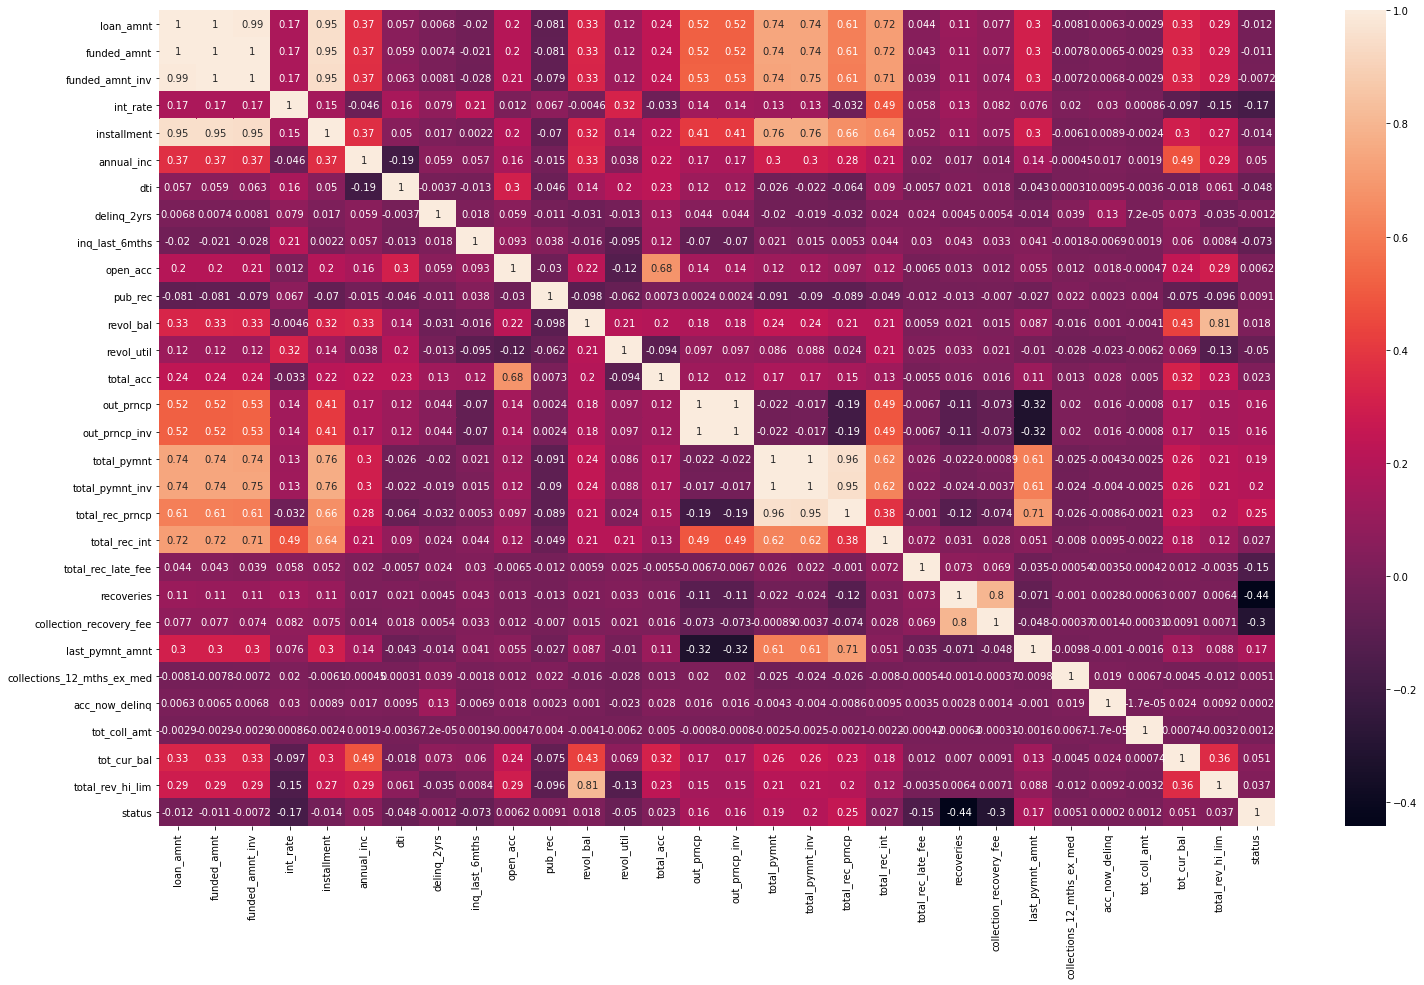

In [59]:
data_correlation_matrix = data.corr()
plt.figure(figsize = (25,15))
sns.heatmap(data_correlation_matrix, annot=True)

In [60]:
cor_mat = data.corr().abs()

In [61]:
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape), k =1).astype(np.bool))

In [62]:
upper_tri

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,status
loan_amnt,NaN,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,0.020328,0.204182,...,0.043650,0.110691,0.077336,0.304243,0.008067,0.006283,0.002859,0.332686,0.290208,0.011819
funded_amnt,NaN,NaN,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,0.020970,0.204983,...,0.043350,0.110338,0.077190,0.304178,0.007822,0.006472,0.002859,0.332683,0.290206,0.011003
funded_amnt_inv,NaN,NaN,NaN,0.169353,0.947387,0.367806,0.062606,0.008143,0.027580,0.205807,...,0.038985,0.107944,0.073781,0.303105,0.007175,0.006801,0.002858,0.332677,0.290185,0.007191
int_rate,NaN,NaN,NaN,NaN,0.148790,0.046072,0.159657,0.079190,0.205641,0.012307,...,0.057875,0.127893,0.082198,0.075609,0.020306,0.030338,0.000863,0.097316,0.146838,0.172361
installment,NaN,NaN,NaN,NaN,NaN,0.368145,0.049919,0.017001,0.002247,0.196839,...,0.052341,0.105666,0.075344,0.299867,0.006055,0.008923,0.002359,0.300639,0.270074,0.013936
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,0.188548,0.058896,0.056675,0.157784,...,0.020273,0.016954,0.013680,0.142155,0.000445,0.017133,0.001895,0.486086,0.291955,0.049864
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003694,0.012541,0.303914,...,0.005747,0.021462,0.018084,0.043068,0.000308,0.009491,0.003560,0.018384,0.060972,0.048102
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017985,0.059134,...,0.024428,0.004484,0.005382,0.013740,0.039147,0.126532,0.000072,0.072699,0.035028,0.001227
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092788,...,0.029995,0.042945,0.032718,0.041229,0.001804,0.006918,0.001887,0.060198,0.008383,0.073102
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006476,0.013437,0.012086,0.054893,0.011852,0.018194,0.000467,0.243536,0.290747,0.006174


In [63]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > .95)]

In [64]:
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

In [65]:
data.drop(columns = to_drop, inplace = True)

<AxesSubplot:>

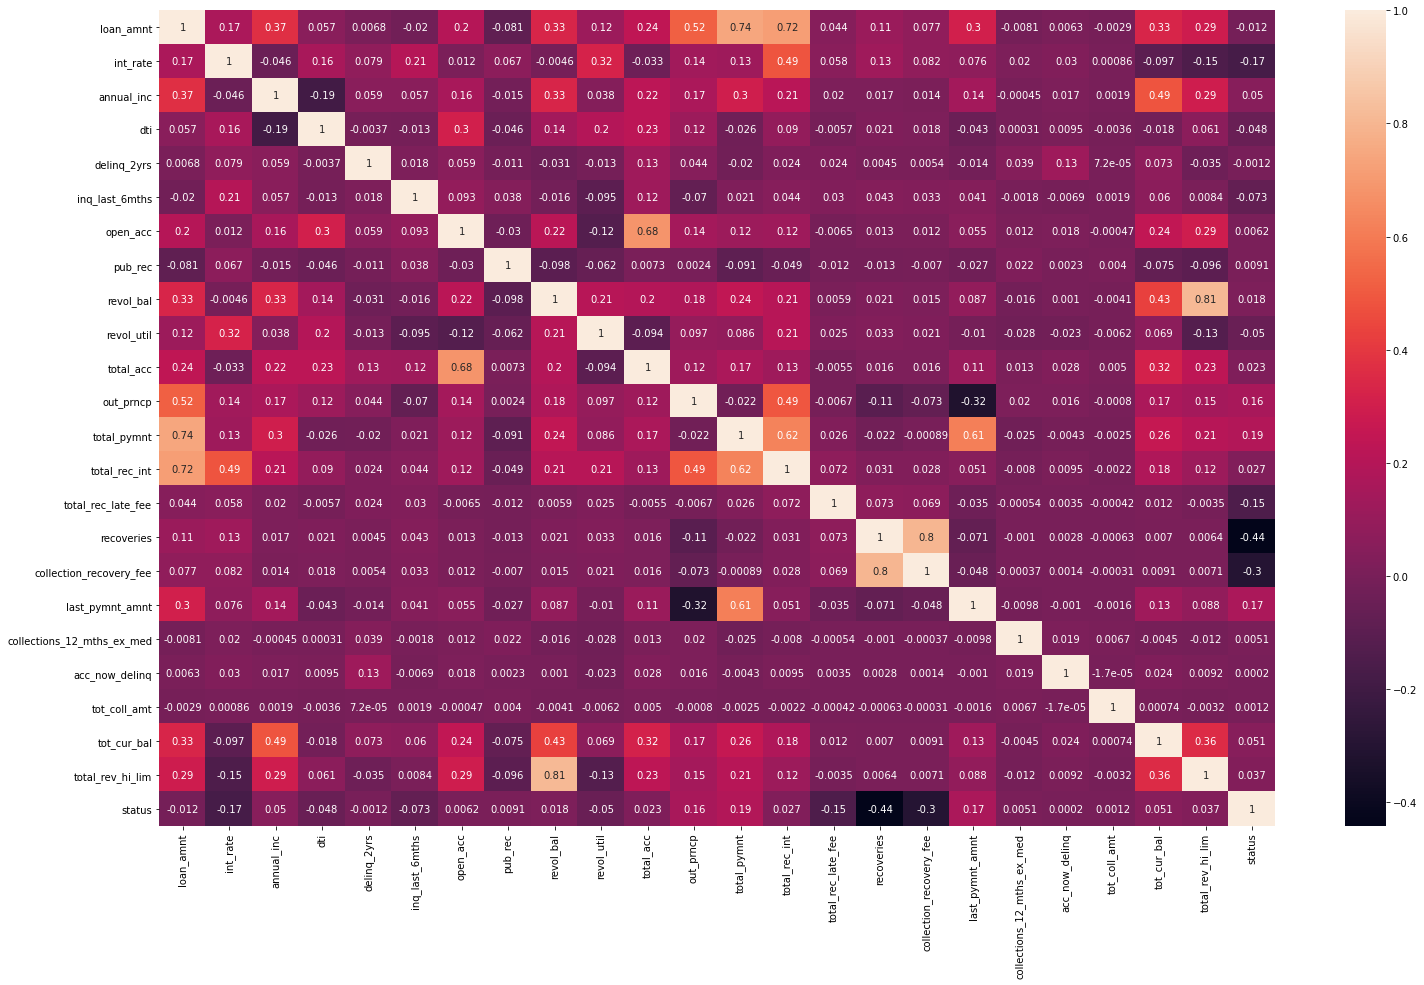

In [66]:
data_correlation_matrix = data.corr()
plt.figure(figsize = (25,15))
sns.heatmap(data_correlation_matrix, annot=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   sub_grade                   466285 non-null  object 
 5   emp_length                  445277 non-null  object 
 6   home_ownership              466285 non-null  object 
 7   annual_inc                  466281 non-null  float64
 8   verification_status         466285 non-null  object 
 9   issue_d                     466285 non-null  object 
 10  loan_status                 466285 non-null  object 
 11  pymnt_plan                  466285 non-null  object 
 12  purpose                     466285 non-null  object 
 13  addr_state    